In [4]:
%load_ext autoreload
%autoreload 2

import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from langgraph.types import interrupt, Command

from src.open_deep_research.newsletter_graph import builder


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


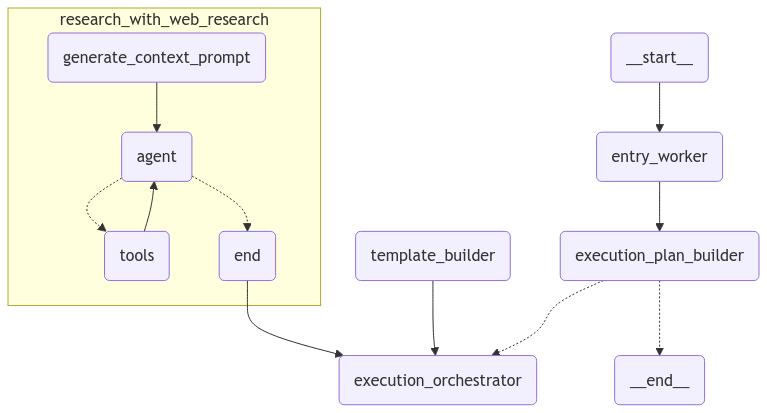

In [5]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [6]:
import uuid 

# Fast config with DeepSeek-R1-Distill-Llama-70B
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "groq",
#                            "max_search_depth": 1,
#                            "planner_model": "deepseek-r1-distill-llama-70b"}}

# Fast config with o3-mini
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "tavily",
                           "planner_provider": "openai",
                           "max_search_depth": 1,
                           "planner_model": "o3-mini"}}

# Slow config, more in depth
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "perplexity",
#                            "planner_provider": "openai",
#                            "max_search_depth": 2,
#                            "planner_model": "o3-mini"}}

# Create a topic
# topic = "Overview of the AI inference market with focus on Fireworks, Together.ai, Groq"

# Run the graph until the interruption
async for event in graph.astream({"final_report":"disregard"}, thread, stream_mode="updates"):
    print(event)
    print("\n")



NEWSLETTER GENERATION STARTED: 2025-02-28 10:17:07


[STATE UPDATE: NewsletterState] from node entry_worker
{'entry_worker': {'execution_plan': ExecutionPlan(items=[ReconsiderationBlock(id='initial_plan_creation', block_type=<BlockType.RECONSIDERATION: 'reconsideration'>, description='Create the initial execution plan for the newsletter generation process', status=<Status.PENDING: 'pending'>, output='', reason='This is the entry point for the workflow that will establish the full research and content generation plan for the newsletter', guiding_questions=['What specific research blocks are needed to gather comprehensive information on the newsletter topic?', 'How should the newsletter template be structured based on the newsletter metadata?', 'What dependencies exist between different research components?', 'At what points should plan reconsideration occur to evaluate and refine the approach?', 'How should the research plan incorporate any recurring themes from past newsletters?', 'Wh

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [ ]:
# Pass feedback to update the report plan  
async for event in graph.astream(Command(resume="Include a revenue estimate (ARR) in the sections focused on Groq, Together.ai, and Fireworks"), thread, stream_mode="updates"):
    print(event)
    print("\n")

In [ ]:
# Pass True to approve the report plan 
async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

In [ ]:
from IPython.display import Markdown
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)